## Task 2 - Supervised Machine Learning

Using regression technique, predicting the percentage of marks that a student is expected to score based upon the no. of hours they have studied. 

In [1]:
# Importing all the important libraries

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Reading the data into a file

url = "http://bit.ly/w-data"
data = pd.read_csv(url)
data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
data.shape

(25, 2)

In [4]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [5]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


## Data Visualization

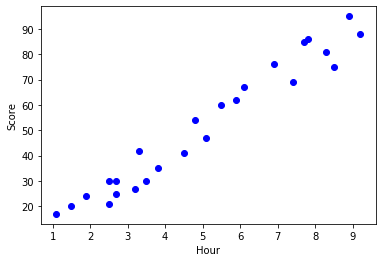

In [6]:
# Plotting Scatter Plot

plt.xlabel("Hour")
plt.ylabel("Score")
plt.scatter(data['Hours'],data['Scores'],color='blue')

In [7]:
x=data.iloc[:,:1].values
y=data.iloc[:,1].values

## Model Training

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
# Splitting the dataset into train and test data for the model
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [10]:
from sklearn.linear_model import LinearRegression
Lr=LinearRegression()

In [11]:
Lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Regression line Visualization 

In [12]:
pred=Lr.coef_*x_train+Lr.intercept_

Text(0, 0.5, 'Score')

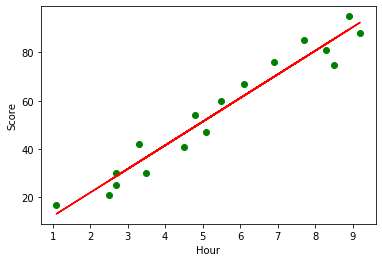

In [13]:
plt.scatter(x_train, y_train,color='green')
plt.plot(x_train, pred,color='red')
plt.xlabel('Hour')
plt.ylabel('Score')

In [14]:
print("Intercept: ",Lr.intercept_)

Intercept:  2.370815382341881


In [15]:
print("Coefficient: ",Lr.coef_)

Coefficient:  [9.78856669]


## Model Predictions

In [16]:
y_pred=Lr.predict(x_test)

In [17]:
test_d=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
test_d

,Actual,Predicted
0,20,17.053665
1,27,33.694229
2,69,74.806209
3,30,26.842232
4,62,60.123359
5,35,39.567369
6,24,20.969092
7,86,78.721636


### Accuracy of the model

In [18]:
from sklearn import metrics
metrics.r2_score(y_test,y_pred)

0.9568211104435257

### Evaluting the model 

In [19]:
print("Mean absolute error: ",metrics.mean_absolute_error(y_test,y_pred))
print("Mean squared error: ",metrics.mean_squared_error(y_test,y_pred))
print("Root Mean Squared error: ",np.sqrt(metrics.mean_absolute_error(y_test,y_pred)))

Mean absolute error:  4.419727808027652
Mean squared error:  22.96509721270043
Root Mean Squared error:  2.1023148689070466


### Predicting the Score

In [20]:
pred_score=Lr.predict([[9.25]])
print("Predicted score for a student studying 9.25 hours is: ",pred_score)

Predicted score for a student studying 9.25 hours is:  [92.91505723]
